## FINAL PROJECT - Exploratory Data Analysis

### Project Description :
This dataset represents Newyork housing datasets where each row indicates a project and its status based on the number of bed rooms(1-BR, 2-BR, 3_BR,...,6BR+ units) and location.

### Project Proposal :
Based on the multiple features like number of bed rooms, income levels, latitude, longitude, project completion date etc. predicting the total units that will be produced.

### Data Source :
https://data.cityofnewyork.us/Housing-Development/Housing-New-York-Units-by-Building/hg8x-zxpr

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("Housing_New_York_Units_by_Building.csv")

#### Inspecting the data

In [3]:
df.head(5).T

,0,1,2,3,4
Project ID,65390,67895,69246,69246,69246
Project Name,81 - 95 LENOX AVENUE AKA CANAAN IV TOWERS,CLINTON TOWERS HOUSING CO INC.PLP.FY22,CARROLL-BURKE HDFC.PLP.FY22,CARROLL-BURKE HDFC.PLP.FY22,CARROLL-BURKE HDFC.PLP.FY22
Project Start Date,12/30/2021,12/30/2021,12/30/2021,12/30/2021,12/30/2021
Project Completion Date,NaN,NaN,NaN,NaN,NaN
Building ID,842019.0,5318.0,60025.0,60030.0,60031.0
Number,95,540,755,797,801
Street,LENOX AVENUE,WEST 55 STREET,CROTONA PARK NORTH,CROTONA PARK NORTH,CROTONA PARK NORTH
Borough,Manhattan,Manhattan,Bronx,Bronx,Bronx
Postcode,10026.0,10019.0,10457.0,10457.0,10457.0
BBL,1018240016.0,1010830001.0,2029420001.0,2029420001.0,2029420001.0


### Exploratory Data Analysis
The report analysis depicts that :
- The dataframe has 5631 rows and each row represents a housing project.
- The dataframe has 41 features(columns).
- info() method hepls in knowing the quick description about the dataframe.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5631 entries, 0 to 5630
Data columns (total 41 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Project ID                          5631 non-null   int64  
 1   Project Name                        5631 non-null   object 
 2   Project Start Date                  5631 non-null   object 
 3   Project Completion Date             3886 non-null   object 
 4   Building ID                         4561 non-null   float64
 5   Number                              5631 non-null   object 
 6   Street                              5631 non-null   object 
 7   Borough                             5631 non-null   object 
 8   Postcode                            4496 non-null   float64
 9   BBL                                 4415 non-null   float64
 10  BIN                                 2856 non-null   float64
 11  Community Board                     5631 no

#### Dropping unnecessary columns from the dataset

In [5]:
df1=df.drop(['Project Name','Project Start Date','Project Completion Date','Building ID','Number','Street','Postcode','BBL','BIN','Community Board','Latitude (Internal)','Longitude (Internal)','Council District','Unknown-BR Units','Counted Rental Units','Counted Homeownership Units','All Counted Units'], axis = 1)

df1

,Project ID,Borough,Census Tract,NTA - Neighborhood Tabulation Area,Latitude,Longitude,Building Completion Date,Reporting Construction Type,Extended Affordability Only,Prevailing Wage Status,...,Middle Income Units,Other Income Units,Studio Units,1-BR Units,2-BR Units,3-BR Units,4-BR Units,5-BR Units,6-BR+ Units,Total Units
0,65390,Manhattan,218,MN11,40.801226,-73.950278,NaN,Preservation,No,Non Prevailing Wage,...,10,1,0,63,89,9,0,0,0,161
1,67895,Manhattan,135,MN15,40.768560,-73.991307,NaN,Preservation,No,Non Prevailing Wage,...,0,0,38,130,146,76,6,0,0,396
2,69246,Bronx,163,BX99,40.837941,-73.895254,NaN,Preservation,No,Non Prevailing Wage,...,0,1,0,22,6,1,1,0,0,30
3,69246,Bronx,163,BX99,40.837941,-73.895254,NaN,Preservation,No,Non Prevailing Wage,...,0,0,0,1,11,9,0,0,0,21
4,69246,Bronx,163,BX99,40.837941,-73.895254,NaN,Preservation,No,Non Prevailing Wage,...,0,1,0,0,9,9,4,0,0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5626,55697,Brooklyn,NaN,NaN,NaN,NaN,01/14/2014,Preservation,No,Non Prevailing Wage,...,1,0,0,0,0,0,0,0,0,1
5627,55773,Staten Island,NaN,NaN,NaN,NaN,01/10/2014,Preservation,No,Non Prevailing Wage,...,1,0,0,0,0,0,0,0,0,1
5628,57341,Staten Island,NaN,NaN,NaN,NaN,01/10/2014,New Construction,No,Non Prevailing Wage,...,0,0,0,0,0,0,0,0,0,1
5629,55647,Brooklyn,NaN,NaN,NaN,NaN,01/07/2014,Preservation,No,Non Prevailing Wage,...,1,0,0,0,0,0,0,0,0,1


In [6]:
df1

,Project ID,Borough,Census Tract,NTA - Neighborhood Tabulation Area,Latitude,Longitude,Building Completion Date,Reporting Construction Type,Extended Affordability Only,Prevailing Wage Status,...,Middle Income Units,Other Income Units,Studio Units,1-BR Units,2-BR Units,3-BR Units,4-BR Units,5-BR Units,6-BR+ Units,Total Units
0,65390,Manhattan,218,MN11,40.801226,-73.950278,NaN,Preservation,No,Non Prevailing Wage,...,10,1,0,63,89,9,0,0,0,161
1,67895,Manhattan,135,MN15,40.768560,-73.991307,NaN,Preservation,No,Non Prevailing Wage,...,0,0,38,130,146,76,6,0,0,396
2,69246,Bronx,163,BX99,40.837941,-73.895254,NaN,Preservation,No,Non Prevailing Wage,...,0,1,0,22,6,1,1,0,0,30
3,69246,Bronx,163,BX99,40.837941,-73.895254,NaN,Preservation,No,Non Prevailing Wage,...,0,0,0,1,11,9,0,0,0,21
4,69246,Bronx,163,BX99,40.837941,-73.895254,NaN,Preservation,No,Non Prevailing Wage,...,0,1,0,0,9,9,4,0,0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5626,55697,Brooklyn,NaN,NaN,NaN,NaN,01/14/2014,Preservation,No,Non Prevailing Wage,...,1,0,0,0,0,0,0,0,0,1
5627,55773,Staten Island,NaN,NaN,NaN,NaN,01/10/2014,Preservation,No,Non Prevailing Wage,...,1,0,0,0,0,0,0,0,0,1
5628,57341,Staten Island,NaN,NaN,NaN,NaN,01/10/2014,New Construction,No,Non Prevailing Wage,...,0,0,0,0,0,0,0,0,0,1
5629,55647,Brooklyn,NaN,NaN,NaN,NaN,01/07/2014,Preservation,No,Non Prevailing Wage,...,1,0,0,0,0,0,0,0,0,1


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5631 entries, 0 to 5630
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Project ID                          5631 non-null   int64  
 1   Borough                             5631 non-null   object 
 2   Census Tract                        4502 non-null   object 
 3   NTA - Neighborhood Tabulation Area  4502 non-null   object 
 4   Latitude                            4496 non-null   float64
 5   Longitude                           4496 non-null   float64
 6   Building Completion Date            4061 non-null   object 
 7   Reporting Construction Type         5631 non-null   object 
 8   Extended Affordability Only         5631 non-null   object 
 9   Prevailing Wage Status              5631 non-null   object 
 10  Extremely Low Income Units          5631 non-null   int64  
 11  Very Low Income Units               5631 no

#### Observations :

- Census Tract and NTA has only 4502 entries, Latitude and Longitude has 4496 whereas Building Completion Date has only 4061 entries which means the remaining values are missing in these columns.
- Census Tract,NTA - Neighborhood Tabulation Area,Building Completion Date ,Reporting Construction Type,Extended Affordability Only ,Prevailing Wage Status attributes are of object Data type and the values in this attribute is repetitive which means that it is probably categorical attribute. 
- The value counts method can be used to find the categories(below).
- Latitute and logitude columns are of type float.
- All the income units and units attributes are of type int.

In [8]:
for column in df1.columns:
     print("\n" + column)
     print(df1[column].value_counts())


Project ID
53017    83
68530    79
66670    79
53157    75
59857    56
         ..
68669     1
68624     1
68681     1
68712     1
55759     1
Name: Project ID, Length: 3042, dtype: int64

Borough
Brooklyn         2299
Bronx            1369
Manhattan        1002
Queens            709
Staten Island     252
Name: Borough, dtype: int64

Census Tract
1070     118
46201     78
916       51
299       48
230       43
        ... 
518        1
510        1
26602      1
86         1
53601      1
Name: Census Tract, Length: 665, dtype: int64

NTA - Neighborhood Tabulation Area
BK82    254
MN03    216
BK61    208
BK75    157
BK78    149
       ... 
BK31      1
BK26      1
SI14      1
QN05      1
QN53      1
Name: NTA - Neighborhood Tabulation Area, Length: 159, dtype: int64

Latitude
40.837941    14
40.750871     5
40.871873     5
40.686032     4
40.856665     3
             ..
40.864578     1
40.877517     1
40.877490     1
40.877545     1
40.663863     1
Name: Latitude, Length: 4328, dtype: in

#### Inspecting the Data using Histograms: 
Lets have a look for the scatter plot

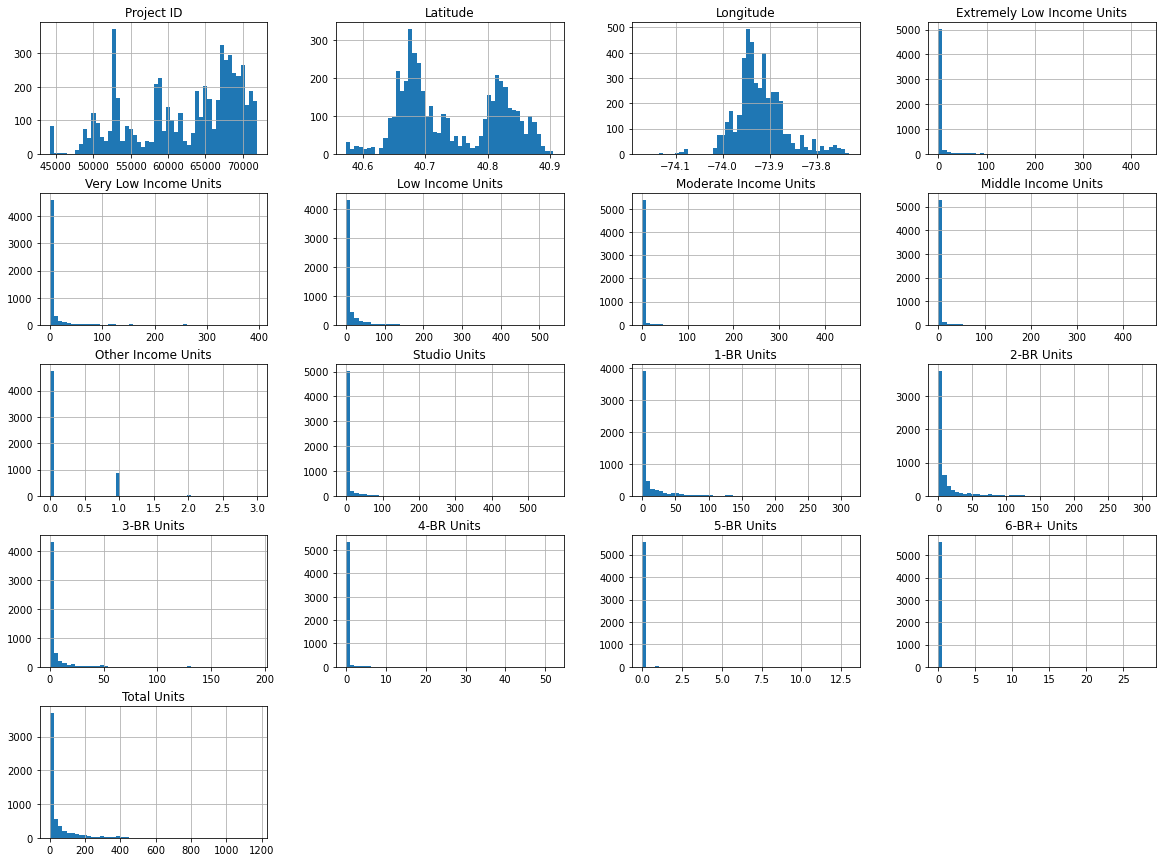

In [9]:
# Plotting the Histograms of Numerical Attributes.
plt.show()                                     
df1.hist(bins=50, figsize=(20, 15))  
plt.show()                                      

#### Inspecting geographical data

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

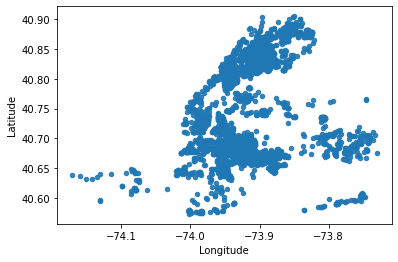

In [10]:
# Visualizing the Geographical Data:
df1.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.9)

- The units are highly distributed between -74.0 to -73.9 Longitute and 40.6 to 40.87

In [11]:
cat = list(df1.Borough.value_counts())
cat

[2299, 1369, 1002, 709, 252]

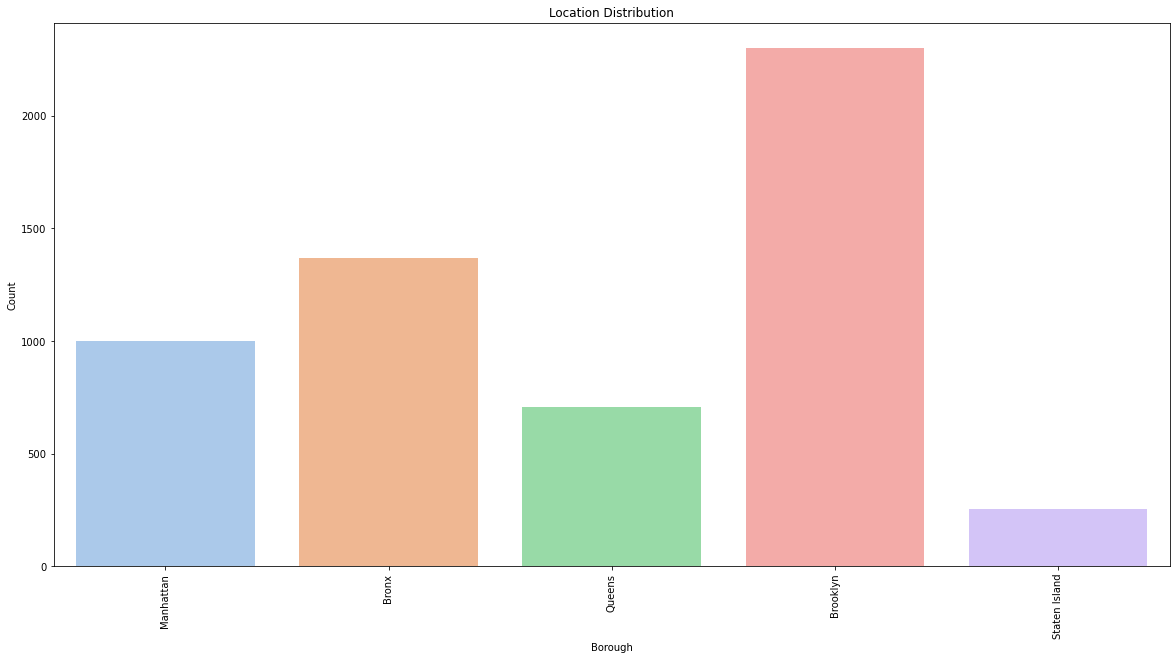

In [12]:
sns.countplot(x='Borough', palette="pastel", data=df1)
plt.gcf().set_size_inches(20,10)
plt.title('Location Distribution')
plt.xlabel('Borough')
plt.xticks(rotation='vertical')
plt.ylabel('Count')
plt.show()

- The Borough is the borough where the building is located.
- The above Geographical Distribution represents the count of building units at a particular location.

#### Inspecting the Low income attribute

<AxesSubplot:>

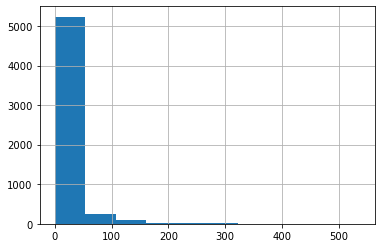

In [13]:
#@ Inspecting the Low income attribute:
df1["Low Income Units"].hist()

- By observing the Histogram more closely, the values of Low Income Units are clustered around 0 and 50 but some Low Income Units goes beyond 50. I will create an income category attribute with 5 categories which are labeled from 60 to 300.

1    216
2     63
3     28
4     19
5     12
Name: income_cat, dtype: int64




<AxesSubplot:>

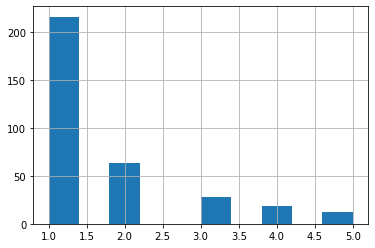

In [14]:
#@ Creating the Income Categories:
df1["income_cat"] = pd.cut(df1["Low Income Units"],
                               bins=[60,120,180,240,300, np.inf],
                               labels=[1, 2, 3, 4, 5])

#@ Inspecting the Income Categories:
print(df1["income_cat"].value_counts())
print("\n")
df1["income_cat"].hist()     

#### Finding the correlation with Scatter plots and Moderate Income Units

In [15]:
# Correlations:
# Correlations of each attributes with median house value.
corr_matrix = df1.corr()
print(corr_matrix["Moderate Income Units"].sort_values(ascending=False))            


Moderate Income Units         1.000000
Studio Units                  0.338829
1-BR Units                    0.337571
Total Units                   0.299790
2-BR Units                    0.236206
Other Income Units            0.151171
Low Income Units              0.142775
3-BR Units                    0.102082
Middle Income Units           0.085611
Extremely Low Income Units    0.067900
Latitude                      0.030323
4-BR Units                    0.028921
Very Low Income Units         0.024052
Project ID                    0.000464
6-BR+ Units                  -0.002083
5-BR Units                   -0.006969
Longitude                    -0.040222
Name: Moderate Income Units, dtype: float64


array([[<AxesSubplot:xlabel='1-BR Units', ylabel='1-BR Units'>,
        <AxesSubplot:xlabel='2-BR Units', ylabel='1-BR Units'>,
        <AxesSubplot:xlabel='3-BR Units', ylabel='1-BR Units'>,
        <AxesSubplot:xlabel='4-BR Units', ylabel='1-BR Units'>,
        <AxesSubplot:xlabel='5-BR Units', ylabel='1-BR Units'>,
        <AxesSubplot:xlabel='6-BR+ Units', ylabel='1-BR Units'>],
       [<AxesSubplot:xlabel='1-BR Units', ylabel='2-BR Units'>,
        <AxesSubplot:xlabel='2-BR Units', ylabel='2-BR Units'>,
        <AxesSubplot:xlabel='3-BR Units', ylabel='2-BR Units'>,
        <AxesSubplot:xlabel='4-BR Units', ylabel='2-BR Units'>,
        <AxesSubplot:xlabel='5-BR Units', ylabel='2-BR Units'>,
        <AxesSubplot:xlabel='6-BR+ Units', ylabel='2-BR Units'>],
       [<AxesSubplot:xlabel='1-BR Units', ylabel='3-BR Units'>,
        <AxesSubplot:xlabel='2-BR Units', ylabel='3-BR Units'>,
        <AxesSubplot:xlabel='3-BR Units', ylabel='3-BR Units'>,
        <AxesSubplot:xlabel='4-BR Un

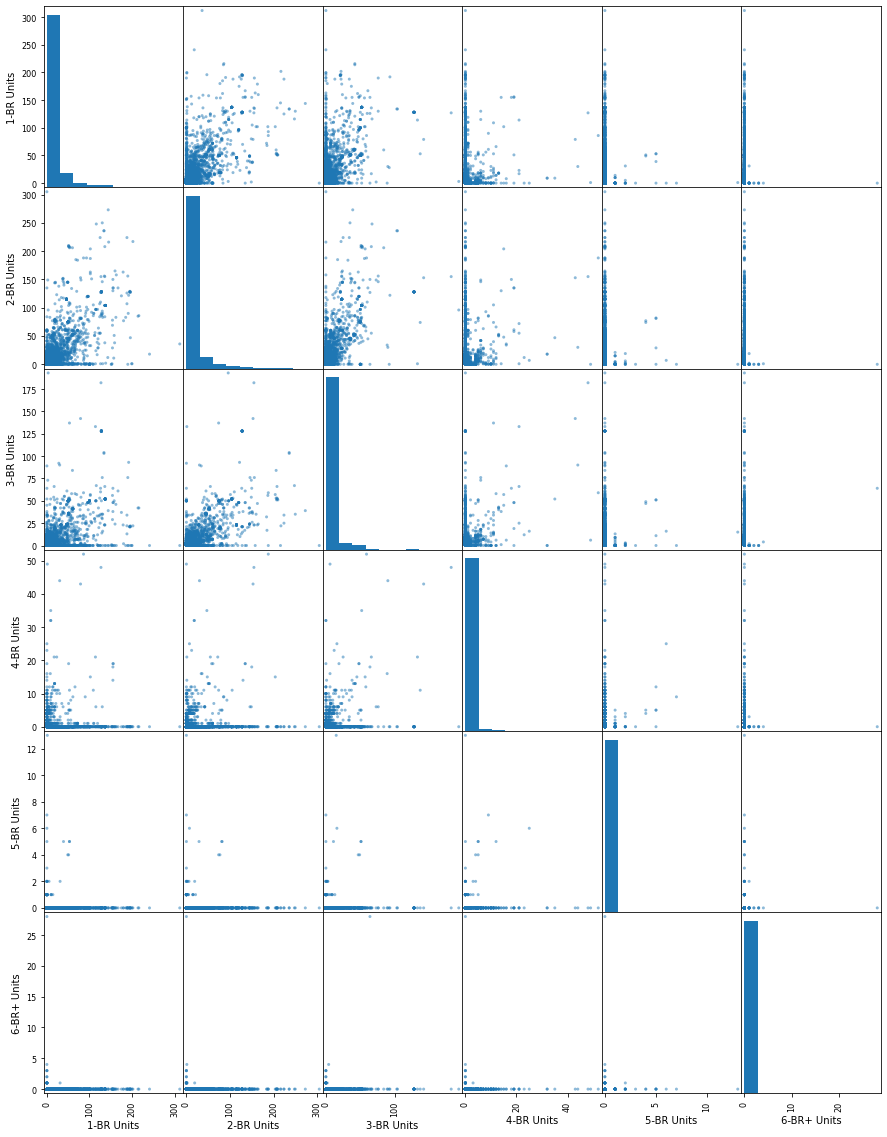

In [16]:
#@ Correlations using Scatter matrix:
from pandas.plotting import scatter_matrix
attributes = ["1-BR Units", "2-BR Units", "3-BR Units","4-BR Units","5-BR Units","6-BR+ Units"]
scatter_matrix(df1[attributes], figsize=(15, 20))


- It is observed that 5 and 6BR+ units have negative correlation when compared with Moderate Income Units.
- It is because moderate units include less than 5-BR.
- It moslty include 2-4BR units.

Using categorical plots to find the count and distributions.

- Categorical plot for Extended Affordability Only

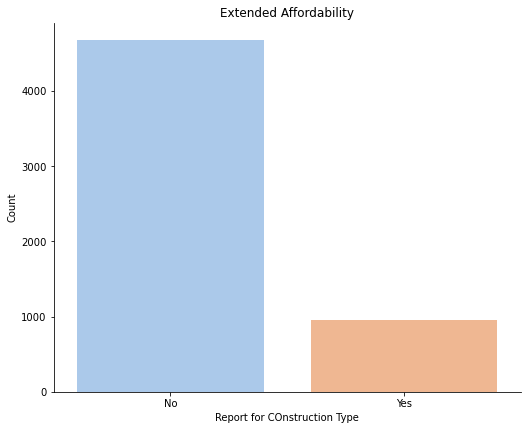

In [17]:
sns.catplot(x="Extended Affordability Only", kind="count", palette="pastel", data=df1)
plt.title('Extended Affordability')
plt.ylabel('Count')
plt.xlabel('Report for COnstruction Type')
plt.gcf().set_size_inches(8,6)
plt.show()

- The report generated shows thr Extended Affordability Only field indicates whether the project is considered to be Extended Affordability.
- An extended affordability project involves no construction, but secures an extended or new regulatory agreement. 
- All extended affordability projects have a ‘reporting construction type’ of ‘preservation(yes /no). 

#### Categorical plot for Prevailing Wage Status

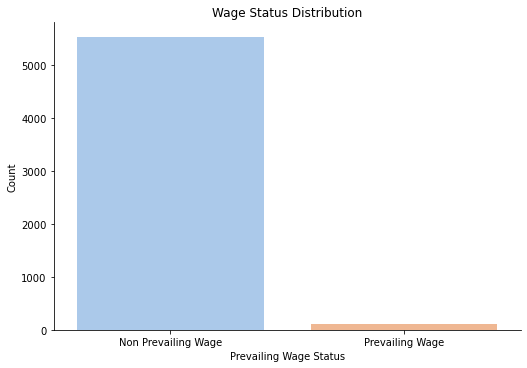

In [18]:
sns.catplot(x="Prevailing Wage Status", kind="count", palette="pastel", data=df1)
plt.title('Wage Status Distribution')
plt.ylabel('Count')
plt.xlabel('Prevailing Wage Status')
plt.gcf().set_size_inches(8,5)
plt.show()

- The graph depicts that most of the houses are under non-prevailing wage.
- It is far beyong the requirements and it is not meeting the required criteria.


#### Categorical Distribution for Reporting Construction Type

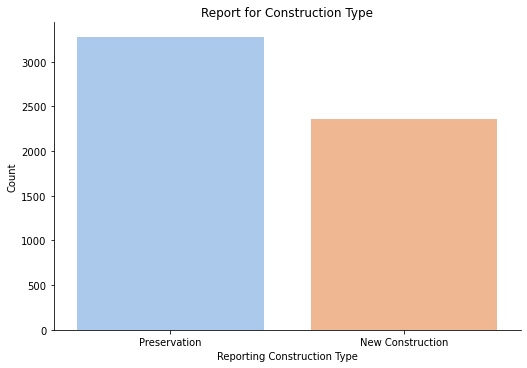

In [19]:
sns.catplot(x="Reporting Construction Type", kind="count", palette="pastel", data=df1)
plt.title('Report for Construction Type')
plt.ylabel('Count')
plt.xlabel('Reporting Construction Type')
plt.gcf().set_size_inches(8,5)
plt.show()

- From the observations most of the construction type is preservation.
- There is no large marginal difference between the two categories.

#### Inspecting Other Income units

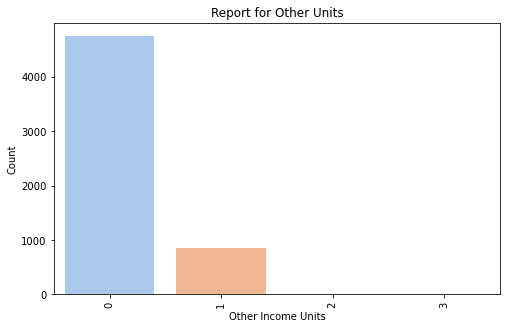

In [20]:
sns.countplot(x='Other Income Units', palette="pastel", data=df1)
plt.gcf().set_size_inches(8,5)
plt.title('Report for Other Units')
plt.xlabel('Other Income Units')
plt.xticks(rotation='vertical')
plt.ylabel('Count')

plt.show()

- Other Units are units reserved for building superintendents.
- The reserved units are around 900.

#### Inspecting 5BR units

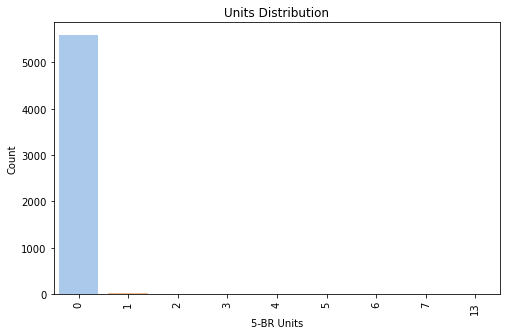

In [21]:
sns.countplot(x='5-BR Units', palette="pastel", data=df1)
plt.gcf().set_size_inches(8,5)
plt.title('Units Distribution')
plt.xlabel('5-BR Units')
plt.xticks(rotation='vertical')
plt.ylabel('Count')
plt.show()

- 5-BR unit distribution that is being included is very less

#### Inspecting 6BR+ units

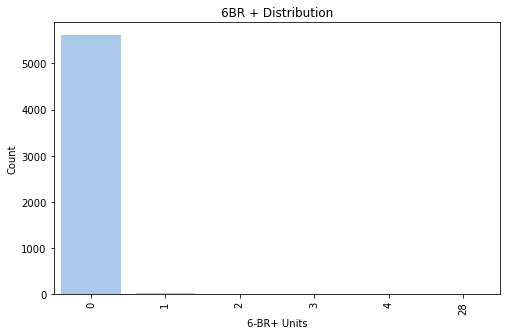

In [22]:
sns.countplot(x='6-BR+ Units', palette="pastel", data=df1)
plt.gcf().set_size_inches(8,5)
plt.title('6BR + Distribution')
plt.xlabel('6-BR+ Units')
plt.xticks(rotation='vertical')
plt.ylabel('Count')
plt.show()

- 6-BR+ unit distribution that is being included is far less than 5-BR

### Conclusion :

The bedroom units are clearly liked to the project income units. So estimating the total units that can be efficiently produced using these features will be my next step od the project.
